In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
print('The n_jobs here is the number of processor allowed to use to enhance the performance.\n')
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=9, n_estimators=100,oob_score=True)
classifier_rf.fit(X_train, y_train)
classifier_rf.oob_score_


The n_jobs here is the number of processor allowed to use to enhance the performance.



0.7653631284916201

In [6]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
params = {
    "max_depth" : [2,3,5,10,20,40],
    "min_samples_leaf" : [5,10,20,50,100,200,400],
    "n_estimators" : [10,25,30,50,100,200,300]
}

In [7]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [8]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 294 candidates, totalling 1176 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 40],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 30, 50, 100, 200, 300]},
             scoring='accuracy', verbose=1)

In [9]:
grid_search.best_score_

0.7839275843007186

In [10]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

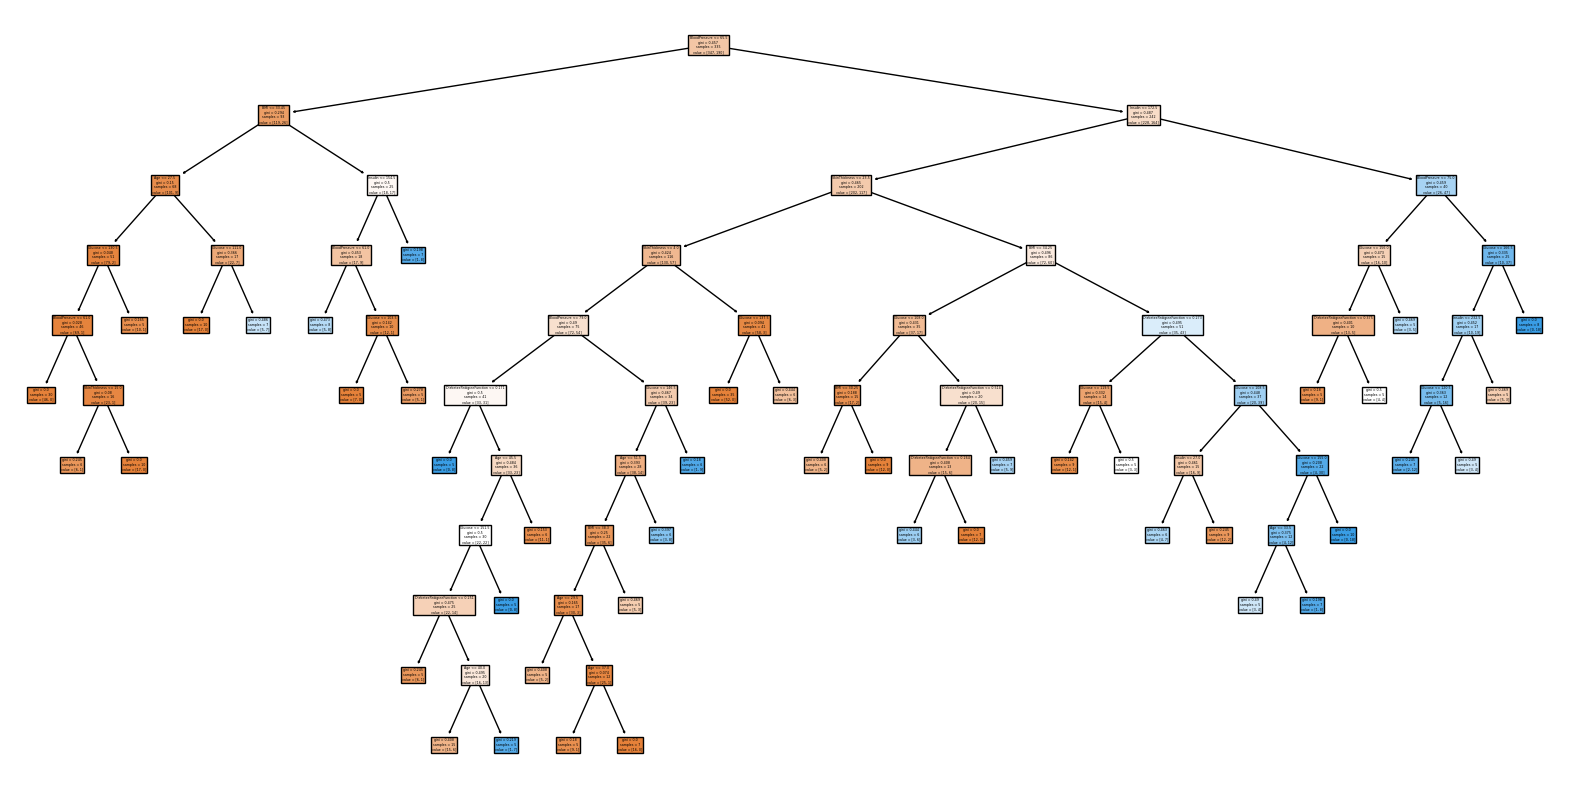

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[6], feature_names= X.columns,filled=True);

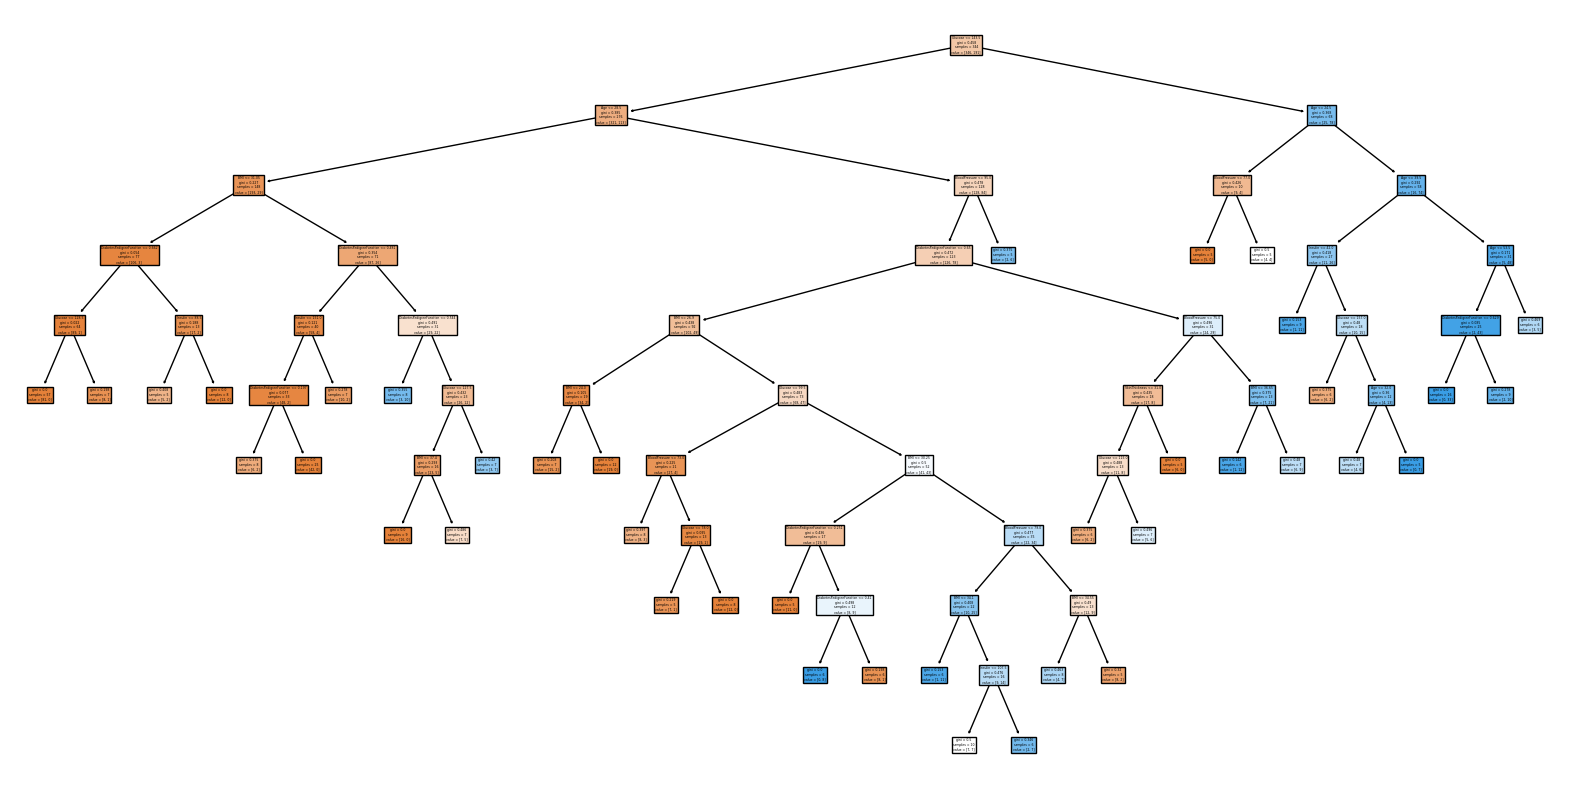

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[7], feature_names= X.columns,filled=True);

In [13]:
rf_best.feature_importances_

array([0.35551526, 0.06445042, 0.06150088, 0.07215175, 0.18398371,
       0.09757298, 0.164825  ])

In [14]:
imp_df = pd.DataFrame({
    'variable name' : X_train.columns,
    'Imp' : rf_best.feature_importances_
})
imp_df.sort_values(by='Imp', ascending=False)

,variable name,Imp
0,Glucose,0.355515
4,BMI,0.183984
6,Age,0.164825
5,DiabetesPedigreeFunction,0.097573
3,Insulin,0.072152
1,BloodPressure,0.064450
2,SkinThickness,0.061501


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)
y_pred = classifier_rf.predict(x_test)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
from sklearn.metrics import accuracy_score
print('accuracy is as follows : ',accuracy_score(y_test, y_pred))

accuracy is as follows :  0.6536796536796536
